## Asset class sizes at a glance

To compare the sizes of the various types of wealth and financial asset classes, please see<br/>
https://www.visualcapitalist.com/all-of-the-worlds-money-and-markets-in-one-visualization-2020/

## Major asset classes of financial products

### Equities (Stocks)

#### Brief description
A stock (equity investment) is a partial ownership of a commercial entity.

Net income / expenses arise from: (1) change in value of the stock (2) dividends (payments to shareholders) (3) taxes.
<br/>
Here `net sum` means summing with signs: plus sign for income, minus sign for expense.

#### Major venues and Volume

Let us have a look together at the [traded volumes of the largest stock exchanges](https://en.wikipedia.org/wiki/List_of_stock_exchanges#Major_stock_exchanges).

#### Example event: IBM 2020-10-08

[Announcement of IBM's spin-off company](https://web.archive.org/web/20201101065304/newsroom.ibm.com/2020-10-08-IBM-To-Accelerate-Hybrid-Cloud-Growth-Strategy-And-Execute-Spin-Off-Of-Market-Leading-Managed-Infrastructure-Services-Unit) $\,\rightarrow\,$ IBM stock price jumped (image source: Google) ![IBM stock price jumped from Oct 07 to Oct 08](./img/IBM-stock-2020-Oct-05-to-09.PNG "IBM stock price jumped from Oct 07 to Oct 08, 2020")

#### Example index: Standard & Poor's 500
The SP500 is the weighted sum of the 500 largest market cap US stocks published every 15 seconds. Note: The S&P 500 is only one of the several S&P indices.

For a short intro, please see the [video at Investopedia on the SP500](https://www.investopedia.com/terms/s/sp500.asp).


###### Selection criteria
Please see [methodology-sp-us-indices.pdf](https://www.spglobal.com/spdji/en/documents/methodologies/methodology-sp-us-indices.pdf) :
1. Market capitalization threshold based on (float-adjusted) capitalization.
2. US company stock traded on one or more major US exchanges.
3. Investable Weight Factor, Viability, Liquidity, plus some Exceptions


###### Calculation details

The S&P 500 index is a ratio.
1. The enumerator is the sum (over the selected stocks) of the number of liquid shares * value of single share.
2. The denominator ensures that the index is continuous in time (stock additions/deletions, company actions).

For details, please see the methodology at &nbsp; [methodology-index-math.pdf](https://www.spglobal.com/spdji/en/documents/methodologies/methodology-index-math.pdf) .

#### Task: Weight distribution of SP500 at two time points

###### How to download the data

1. Go go https://web.archive.org/web/*/https://www.slickcharts.com/sp500 
2. Select a snapshot, for example 2023-12-01.

###### Warm-up questions
* What do the first ten stocks have in common ?
* Which companies have split stocks (for example Alphabet A and C) ?

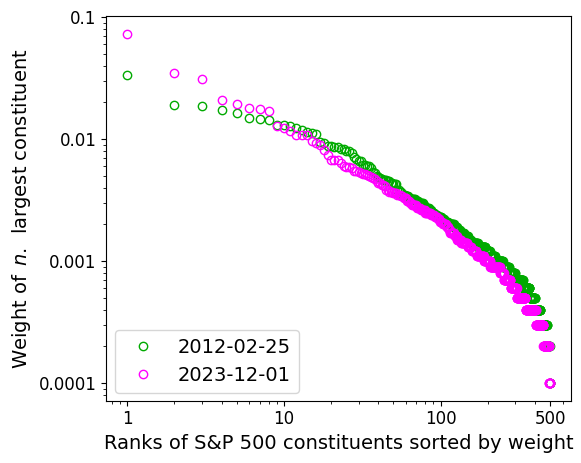

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import re
import requests

DATA_DIR_PATH = 'data'
TIME_STAMP_LIST = ['20120225050608', '20231201225545']
FONTSIZE = 14
TICKS_FONTSIZE = 12
COLORS = '#00aa00', 'magenta'
XTICS, YTICS = [1, 10, 100, 500], [1.0e-4, 0.001, 0.01, 0.1]


def sp500_weights_by_timestamp_from_archive_or_file(time_stamp=None):
    """
    1. If the local data file does not exist, then download data
       from the source and save the processed data to the local file.
    2. In either case load data from the local file.
    """
    assert time_stamp is not None, 'Please provide a time_stamp'

    # if the local data file does not exist, then download, parse and save the data
    data_file_path = pathlib.Path(DATA_DIR_PATH).joinpath(f'sp500_weights_{time_stamp}.txt')
    if not data_file_path.exists():
        url = f'https://web.archive.org/web/{time_stamp}/https://www.slickcharts.com/sp500'
        r = requests.get(url)
        weight_list = []

        # parsing data
        for percent_value in re.findall(r'<td>\s*(\d+\.\d+)\%?</td>', r.text, flags=re.IGNORECASE):    
            weight_list.append(0.01 * float(percent_value))

        # save parsed data
        with open(data_file_path.resolve(), 'w') as f:
            f.write(' '.join([str(w) for w in weight_list]))

    # read data from file and return it
    weight_list = []
    with open(data_file_path.resolve(), 'r') as f:
        weight_list = f.read().split()

    return weight_list


def compare_sp500_weights(time_stamp_list=None, xtics=None, ytics=None, colors=None):
    """
    Compare the distribution of S&P500 weights at two time points.
    It is assumed that the data files are available.
    Read only first 500 items, even if SP500 contains more than 500 weights.
    """
    
    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

    plt.xscale('log')
    plt.yscale('log')
    for time_stamp, color in zip(time_stamp_list, colors):
        weights = sp500_weights_by_timestamp_from_archive_or_file(time_stamp=time_stamp)            
        weights = np.array([float(w) for w in weights[:500]])
        plt.plot(weights, marker='o', linewidth=0, color=color,
                 markerfacecolor='none', markeredgecolor=color,
                 label=time_stamp[:4] + '-' + time_stamp[4:6] + '-' + time_stamp[6:8])

    plt.legend(bbox_to_anchor=(0.02, 0.02), loc=3, borderaxespad=0., fontsize=FONTSIZE)
    plt.xticks(xtics, [str(_) for _ in xtics])
    plt.yticks(ytics, [str(_) for _ in ytics])

    plt.xlabel('Ranks of S&P 500 constituents sorted by weight', fontsize=FONTSIZE)
    plt.ylabel('Weight of $\,n.\,$ largest constituent', fontsize=FONTSIZE)

    fig = plt.gcf()
    fig.set_size_inches([6, 5])
    plt.show()

    
compare_sp500_weights(time_stamp_list=TIME_STAMP_LIST, xtics=XTICS, ytics=YTICS, colors=COLORS)

### Fixed income (mainly Bonds)

#### Brief description

A `bond` is a debt instrument.
The bond market is also called the [credit market](https://www.investopedia.com/terms/c/credit_market.asp).


The investor pays an initial sum at the start, receives interest on it (for example, every 6 months),
<br/>
and `at maturity` receives also the initial payment (the capital, also called: notional).

After a [short introductory video](https://www.investopedia.com/terms/b/bondmarket.asp),
let us first read together [a description of bonds at investor.gov](https://www.investor.gov/introduction-investing/investing-basics/investment-products/bonds-or-fixed-income-products/bonds) .


###### Mortgage-Backed Securities

`Mortgage-Backed Securities` (MBS) are a type of debt security.
<br/>
A bank providing loans sells the capital and fixed interest of the loans bundled to investors.
<br/>
Please watch the video at https://www.investopedia.com/terms/m/mbs.asp .
<br/>
Note: an MBS is only as good as our knowledge of the underlying loans.

#### Volume and Instrument types

US Fixed Income trading volume at https://www.sifma.org/resources/research/fixed-income-chart $\,\rightarrow\,$ Issuance $\,\rightarrow\,$ All quarters.
<br/>
See also https://www.sifma.org/about.

International: https://stats.bis.org/statx/srs/table/c1 ,
<br/>
see also https://www.bis.org/about

Please read also the following to compare bonds to stocks:<br/>
https://www.investopedia.com/ask/answers/09/bond-over-the-counter.asp

#### Example event: US 10y Const Mat Rate 2020-March

The US 10Y Constant Maturity Rate dropped in Februrary-March 2020

1. Constant Maturity Rate: always for a fixed amount of time (for example, 10y) from the given business day


2. View data: https://fred.stlouisfed.org/series/DGS10

#### Example index: VBMFX (Vanguard Total Bond Market Index)

Let us read together the following :

* At https://institutional.vanguard.com/investments/product-details/fund/0084 please select `Fund literature`,<br/>download the `Fact sheet` and read `Investment strategy`.


* Also, at https://www.investopedia.com/articles/investing/111715/how-vanguard-index-funds-work.asp<br/>
please read the section `Key takeaways`.

#### Task: Tranche income and its volatility from uncorrelated payments

Please see the `Key takeaways` at https://www.investopedia.com/terms/t/tranches.asp.


Now assume that tomorrow you will have a `very large number` ($\,N\,$) of incoming `small payments`.
<br/>
The $i$. payment will be 1 with probability $\,p_i\,$ and 0 with probability $\,1-p_i\,$.
<br/>
The payments are `uncorrelated` and the $\,p_i\,$ values are `evenly distributed` in $\,\left(\,0\,,\,1\,\right)\,$.

What will be the
<br/>
`(A)` expected value ($\,E\,$) and volatility ($\,\sigma\,$) of your income ?
<br/>
`(B)` $\,E\,$ and $\,\sigma\,$ of payments that have $\,p_i\,$ values between two fixed $\,p_{\,1} < p_{\,2}\,$ numbers ?
<br/>
`(C)` $\,E\,$ and $\,\sigma\,$ of the payments with the following $\,\left(\,p_{\,1},\,p_{\,2}\,\right)\,$ ranges ?
<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\,\left(\,p_{\,1},\,p_{\,2}\,\right)=\left(\,0.9,\,1\,\right)\,\,\,$ (top tranche) , 
<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\,\dots\,$
<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\,\left(\,p_{\,1},\,p_{\,2}\,\right)=\left(\,0,\,0.1\,\right)\,\,\,$ (lowest quality tranche) .

###### Answers

`(A)` 

The expected income of the entire portfolio is $\,\displaystyle{E_{\,\mathrm{ALL}}=N\int_0^1\!\!\!dp\,\,p  = \frac{N}{2}} \,$.
<br/>
The standard deviation of the entire income is 
<br/>
$\,\displaystyle{\sigma_{\,\mathrm{ALL}}=
\sqrt{N\!\int_0^1\!\!\!dp\,\,\,p\,\left(\,1-1\,\mathit{/}\,2\,\right)^{\,2}+\left(\,1-p\,\right)\,\left(\,0-1\,\mathit{/}\,2\,\right)^{\,2}\,} = \frac{\sqrt{N\,}}{2}
} \,$.

<br/>

`(B)`

The number of such payments is $\,n=N\,\left(\,p_{\,2}-p_{\,1}\,\right)\,$.
<br/>
The expected income is 
$\,\displaystyle{E=n\int_{p_{\,1}}^{p_{\,2}}\!\!dp\,\,p  = 
\
n\,\left( \frac{p_{\,2}^{\,2}}{2}-\frac{p_{\,1}^{\,2}}{2} \right) =
E_{\,\mathrm{ALL}} \, \left(\,p_{\,2}-p_{\,1}\,\right) \, \left(\,p_{\,2}^{\,2}-p_{\,1}^{\,2}\,\right)\,
} \,$.
<br/>
The standard deviation of the income from the $\,\left(\,p_{\,1},\,p_{\,2}\,\right)\,$ tranche is
<br/>
$\,\displaystyle{\sigma=
\sqrt{n\int_{p_{\,1}}^{p_{\,2}}\!\!\!dp\,\,\,p\,\left(\,1-E\,\right)^{\,2} +
\left(\,1-p\,\right)\,\left(\,0-E\,\right)^{\,2}\,} 
= 
}\,$

<br/>

`(C)`

For the 10 tranches mentioned above the expected income and the volatility of the income are calculated below.

**Conclusions**

According to the very simple model we defined above,

* volatility is highest in the tranches that have a payment probability around $1\,\mathit{/}\,2\,$.

* overestimating the quality of a good tranche not only overestimates the income, but also underestimates risk.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ROUND_TO_DIGITS = 3


def simple_tranches_E_and_sigma():
    """Expected next income and volatility of the income from a list of simplified tranches."""
    E_per_E_0 = []
    sigma_per_sigma_0 = []
    for p1 in np.arange(0, 1, 0.1):
        p2 = p1 + 0.1
        E_per_E_0.append(np.square(p2) - np.square(p1))
        sigma_per_sigma_0.append(np.sqrt((np.square(p2) - np.square(p1)) * (1.0 - 0.5 * (p1 + p2))))

    tranches = pd.DataFrame()
    tranches['$p_1$'] = pd.Series(data=np.arange(0, 1, 0.1))
    tranches['$p_2$'] = pd.Series(data=np.arange(0, 1, 0.1) + 0.1)
    tranches['E / $E_{\,0}$'] = pd.Series(data=np.round(E_per_E_0, ROUND_TO_DIGITS))
    tranches['$\sigma$ / $\sigma_{\,0}$'] = pd.Series(data=np.round(sigma_per_sigma_0, ROUND_TO_DIGITS))
    tranches.index += 1  # start tranche indexes from 1
    tranches.index.name = 'Tranche'

    return tranches


display(simple_tranches_E_and_sigma())

,$p_1$,$p_2$,"E / $E_{\,0}$","$\sigma$ / $\sigma_{\,0}$"
Tranche,,,,
1,0.0,0.1,0.01,0.097
2,0.1,0.2,0.03,0.160
3,0.2,0.3,0.05,0.194
4,0.3,0.4,0.07,0.213
5,0.4,0.5,0.09,0.222
6,0.5,0.6,0.11,0.222
7,0.6,0.7,0.13,0.213
8,0.7,0.8,0.15,0.194
9,0.8,0.9,0.17,0.160


### FX (Foreign Exchange)
- The FX market is very liquid. It has the largest volume of all asset classes.
- It has no major venue, it is done mostly through intermediaries.
- FX trading happens 24 / 7

#### Brief description
Let us watch together and discuss the short video at https://www.investopedia.com/terms/f/forex.asp

#### Volumes

1. Please register at `data.nasdaq.com`.
2. Visit https://data.nasdaq.com/databases/CLSRV/documentation.<br/>
Note (a) the definition of a business day, (b) HUF is included in EURHUF and USDHUF.
3. From https://data.nasdaq.com/databases/CLSRV/documentation?anchor=sample-data<br/>
please download the sample data to the file `IDH.json` to the `data` subdirectory of the current directory.
4. Plot the daily volume for a few selected currency pairs.

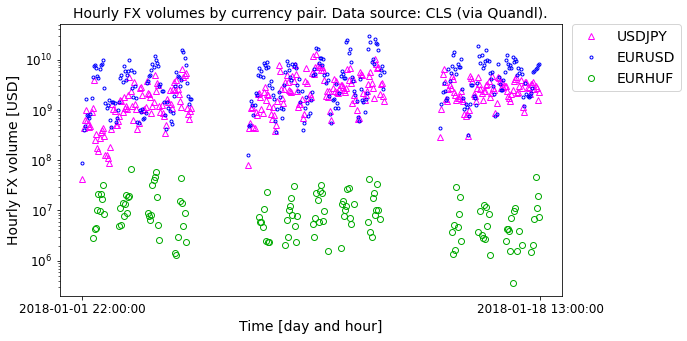

In [3]:
import matplotlib.pyplot as plt
from os.path import join
from json import load, dumps
import pandas as pd

DATA_FILE = join('data', 'IDH.json')
CURRENCY_PAIRS = ['USDJPY', 'EURUSD', 'EURHUF']
FONTSIZE = 14
TICKS_FONTSIZE = 12
COLORS = 'magenta', 'blue', '#00aa00'
MARKERS = '^', '.', 'o'


def extract_currency_pair_fx_volumes():
    """
    Extract fx volumes by currency pairs from the input file 
    """
    with open(DATA_FILE, 'r') as f:

        # read data
        js = load(f)
        # FOR VISUAL TESTING # print(dumps(js, indent=4, sort_keys=True))
        column_names = [column_description['name'] for column_description in js['datatable']['columns']]
        values = {column_name: [] for column_name in column_names}
        for row in js['datatable']['data']:
            for column_name, value in zip(column_names, row):
                values[column_name].append(value)
        df = pd.DataFrame()
        for column_name in column_names:
            df[column_name] = pd.Series(values[column_name])

        # transform
        df['datetime'] = pd.Series([pd.to_datetime(day) +  pd.DateOffset(hours=hour)
                                    for (day, hour) in zip(df['london_date'], df['hour'])])
        df = df[['datetime', 'currency', 'volume_matched']]
        df = df.pivot(index='datetime', columns='currency', values=['volume_matched'])
        df.columns = df.columns.get_level_values(level=1)
        
        return df


def plot_fx_hourly_volumes(df=None, currency_pairs=None, colors=None, markers=None):
    """
    Plot hourly USD volumes of FX currency pairs
    """
    plt.title('Hourly FX volumes by currency pair. Data source: CLS (via Quandl).', fontsize=FONTSIZE)
    plt.xlabel('Time [day and hour]', fontsize=FONTSIZE)
    plt.ylabel('Hourly FX volume [USD]', fontsize=FONTSIZE)
    
    for currency_pair, color, marker in zip(currency_pairs, colors, markers):
        plt.plot(df[currency_pair], marker=marker, linewidth=0, color=color,
                 markerfacecolor='none', markeredgecolor=color, label=currency_pair)

    plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0., fontsize=FONTSIZE)
    xtics = df.index[0], df.index[-1]
    plt.xticks(xtics, [str(_) for _ in xtics])
    plt.yscale('log')

    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)
    
    fig = plt.gcf()
    fig.set_size_inches([9, 5])
    plt.show()


df = extract_currency_pair_fx_volumes()
plot_fx_hourly_volumes(df=df, currency_pairs=CURRENCY_PAIRS, colors=COLORS, markers=MARKERS)

#### Cryptocurrency FX volumes at Bitfinex

For comparison, please have a look at the daily aggregated volumes displayed on the opening page of [bitfinex.com](http://bitfinex.com).

For fun, see also https://trading.bitfinex.com/t/BTC:USD.

#### Example event: Swiss Franc 2015-01-15

* To feel the surprise, please watch patiently [this 1min 45sec video](https://www.youtube.com/embed/vbzw_zgQTbc?mute=1)


* Read this [Reuters news item](https://www.reuters.com/article/us-markets-franc/swiss-franc-jumps-30-percent-after-swiss-national-bank-dumps-euro-ceiling-idUSKBN0KO16Y20150115)


* Read a [broad introductory analysis at Investopedia](https://www.investopedia.com/articles/forex/033115/why-swiss-franc-so-strong.asp)

#### Example index: US Dollar Index

The USD Index is a weighted average of the exchange rates of the USD against selected other currencies.<br/>
Let's see together [the detailed description at ICE](https://www.theice.com/publicdocs/futures_us/ICE_Dollar_Index_FAQ.pdf). 
Note: ICE is the abbreviation of `Intercontinental Exchange`.

#### Task: Volatility of BTHUSD and ETHUSD

Please download from https://www.kaggle.com/tencars/392-crypto-currency-pairs-at-minute-resolution<br/>
the data files `btcusd.csv.zip` and `ethusd.csv.zip` to the data subfolder of the current directory.

Separate data processing from reading to avoid reading the data again while testing the data processing.

Compare the monthly volatilities to the events affecting the two cryptocurrencies. 

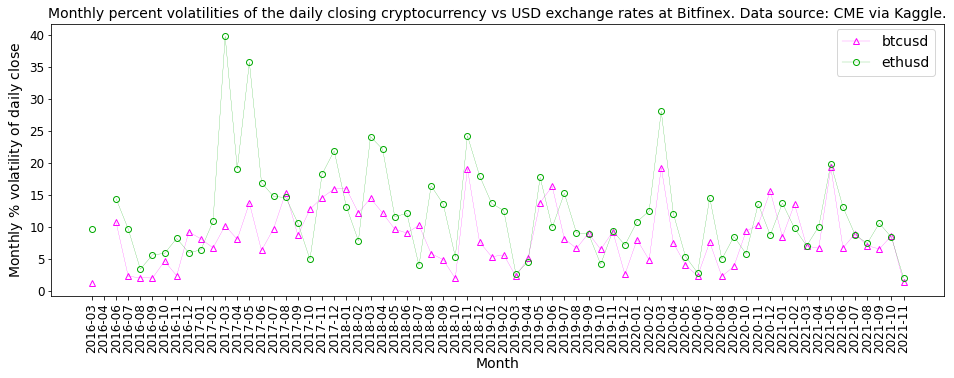

In [4]:
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import os
from copy import deepcopy

DATA_DIR = 'data'
FX_PAIRS = ['btcusd', 'ethusd']
FONTSIZE = 14
TICKS_FONTSIZE = 12
COLORS = 'magenta','#00aa00'
MARKERS = '^', 'o'


def read_merge_crypto_data(pairs=None):
    """
    Read crypto data for requested pairs and merge them into a single dataframe
    pairs: list of cryptocurrency pairs
    fx: fx data
    fxm: fx merged data
    """
    def _column_name_mapping(columns, tag, no_tag_columns):
        """Prepend prefix tag to all column names except the "no_tag_columns" column names."""
        return {col: col if col in no_tag_columns else tag + '_' + col for col in columns}
    
    fx = {pair: pd.read_csv(os.path.join(DATA_DIR, pair + '.csv.zip')) for pair in pairs}
    for pair, df in fx.items():
        df.rename(columns = _column_name_mapping(df.columns, pair, ['time']), inplace=True)
    fxm = deepcopy(fx[pairs[0]])
    for pair_index, pair in enumerate(pairs):
        if pair_index > 0:
            fxm = fxm.merge(fx[pair], on='time')
            
    return fxm


def plot_monthly_crypto_vols(fxm_orig=None, fx_pairs=None, colors=None, markers=None):
    """
    Calculate and plot the monthly volatilities of daily close crypto vs USD rates
    fxm: fx merged data for one or more (crypto)currency pairs
    """
    fxm = deepcopy(fxm_orig)
    fxm['day'] = pd.Series([datetime.fromtimestamp(t // 1000).strftime('%Y-%m-%d') 
                            for t in fxm['time'].to_numpy()])
    fxm['month'] = pd.Series([datetime.fromtimestamp(t // 1000).strftime('%Y-%m') 
                              for t in fxm['time'].to_numpy()])
    remove_columns = [c for c in fxm.columns if c != 'day' and c != 'month' and c != 'time' and 'close' not in c]
    fxm.drop(remove_columns, axis=1, inplace=True)
    daily_close = fxm.loc[fxm.groupby(['day']).time.idxmax()]
    daily_close.drop(['time'], axis=1, inplace=True)
    percent_vols = 100.0 * daily_close.groupby(['month']).std() / daily_close.groupby(['month']).mean()
    
    plt.title(('Monthly percent volatilities of the daily closing cryptocurrency vs USD exchange rates at Bitfinex. '
               'Data source: CME via Kaggle.'), fontsize=FONTSIZE)
    plt.xticks(range(len(percent_vols.index)), [percent_vols.index[i] for i in range(len(percent_vols.index))], 
               rotation='vertical')
    plt.xlabel('Month', fontsize=FONTSIZE)
    plt.ylabel('Monthly $\%$ volatility of daily close', fontsize=FONTSIZE)
    
    for fx_pair, color, marker in zip(fx_pairs, colors, markers):
        plt.plot(percent_vols[fx_pair + '_close'], marker=marker, linewidth=0.2, color=color,
                 markerfacecolor='none', markeredgecolor=color, label=fx_pair, markersize=6)

    plt.legend(bbox_to_anchor=(0.99, 0.98), loc=1, borderaxespad=0., fontsize=FONTSIZE)
    plt.yscale('linear')

    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)
    
    fig = plt.gcf()
    fig.set_size_inches([16, 5])
    plt.show()


fxm = read_merge_crypto_data(pairs=FX_PAIRS)
plot_monthly_crypto_vols(fxm_orig=fxm, fx_pairs=FX_PAIRS, colors=COLORS, markers=MARKERS)

### Commodities

#### Brief description

Commodities mainly coincide with consumables, in other words, things that are depleted upon use.

Please read the first two sections ("What are Commodities?" and "Why Invest in Commodities?") at<br/>
https://global.pimco.com/en-gbl/resources/education/understanding-commodities

The following are the major [types of commodities](https://medium.com/@comdexofficial/commodity-trading-backbone-of-the-global-economy-131c78f12989):
* Energy Commodities (Crude Oil, Heating Oil, Gasoline Coal, Electricity, etc)
  * Oil: [around 100m barrels / day](https://www.iea.org/topics/oil-market-report) , [1 barrel = 119.2 liters](https://coolconversion.com/volume/1-barrel-to-liter)
* Metal Commodities (Aluminum, Copper, Gold, Silver, Platinum, Steel, etc)
* Agriculture Commodities (Barley, Cocoa, Corn, Cotton, Wheat, Sugar, etc)
* Livestock and Meat Commodities (Feeder Cattle, Live cattle, Pork Belly, Lean hogs, etc)

#### Volumes

###### Visual comparison

Please compare the USD volumes of the oil and metal markets at<br/>
https://www.visualcapitalist.com/size-oil-market/

###### CME Group detailed data, includes derivatives

Let's talk about detailed data by commodities sub-classes from the CME Group, for example, the agricultural section:<br/>
https://www.cmegroup.com/market-data/volume-open-interest/agriculture-commodities-volume.html

#### Example event: Shale revolution

In the 2010s the US increased its oil and gas production, and became a net exporter of crude oil and natural gas.

Please read this article for details: https://en.wikipedia.org/wiki/Shale_gas

#### Example indexes

###### S&P GSCI (originally Goldman Sachs Commodity Index)

* Launched in 1991
* Focused on liquid assets, global production and stability

For a detailed description of commodity indexes until 2010, please see 
[Dunsby and Nelson (pdf)](https://summerhavenindex.com/assets/history_of_commodity_indexes.pdf)

###### An informal index: Gold / Oil ratio

https://www.visualcapitalist.com/the-gold-oil-ratio-160-years/

#### Task: A quick look at 2020 

Let us discuss the 2020 history of oil prices by reading the first paragraph on this page:
* [History of Oil Prices (Investopedia)](https://www.investopedia.com/history-of-oil-prices-4842834)

### Real Estate

#### Brief description

Real estate is land and buildings, above the ground and below.

A more detailed grouping of real estate properties is 
(1) residential, (2) commerical, (3) industrial real estate and (4) land.

Please see the section titled ["Types of Real Estate" at this page](
https://www.thebalance.com/real-estate-what-it-is-and-how-it-works-3305882).

#### Example related event: Subprime mortgage crisis

Please read the paragraph titled "Understanding the Subprime Meltdown" at<br/>
https://www.investopedia.com/terms/s/subprime-meltdown.asp

#### Real estate bubbles 2021

Check the graphical summary of the [real estate bubble index of UBS](https://www.ubs.com/global/en/wealth-management/insights/2021/global-real-estate-bubble-index.html). 

Which results are expected for you and which are unexpected ?

#### Task: Plot Zillow data on US real estate list prices vs sale prices

Plot the Zillow Home Value Index (ZHVI) downloaded from https://www.zillow.com/research/data for
* a selected metropolitan area
* and the entire US.

###### Solution

Download the file `Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv`
<br/>
to the `data` subfolder at the current notebook's location.

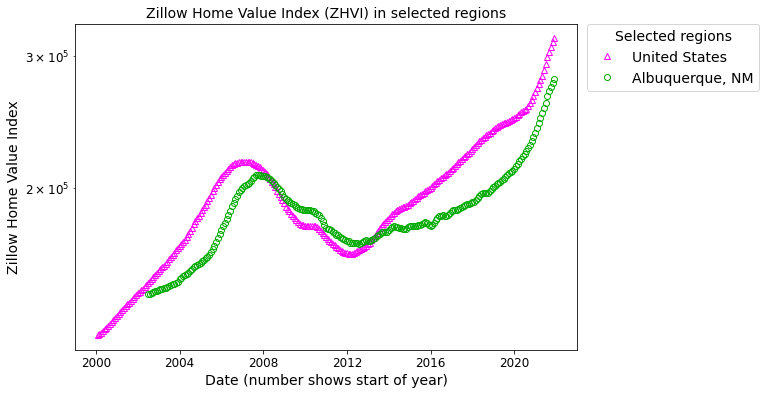

In [5]:
from matplotlib import pyplot as plt
from os.path import join
import pandas as pd

INPUT_DATA = {
    'data_folder': 'data',
    'data_file': 'Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'region_list': ['United States', 'Albuquerque, NM'],
    'fontsize': 14,
    'ticks_fontsize' : 12,
    'color_list': ['magenta','#00aa00'],
    'marker_list': ['^', 'o'],
    'ytics': [1, 2, 3]
}


def plot_zillow_selected_regions(dat=None):

    # read the entire dataframe
    df_all = pd.read_csv(join(dat['data_folder'], dat['data_file'])) 

    # select the rows containing the data for the requested regions
    df = df_all.loc[df_all['RegionName'].isin(dat['region_list'])]

    # set new index: RegionName
    df.set_index('RegionName', inplace=True)

    # remove first four columns (unnecessary for plotting) and transpose df from rows to columns
    df = df.iloc[:, 4:].transpose()

    # Convert the index of the series to datetime
    # and set the name of the index column
    df.index = pd.to_datetime(df.index)
    df.index.names = ['Date']

    # Plot requested data
    plt.title('Zillow Home Value Index (ZHVI) in selected regions', fontsize=dat['fontsize'])
    plt.xlabel('Date (number shows start of year)', fontsize=dat['fontsize'])
    plt.ylabel('Zillow Home Value Index', fontsize=dat['fontsize'])
    
    for region, color, marker in zip(dat['region_list'], dat['color_list'], dat['marker_list']):
        plt.plot(df[region], marker=marker, linewidth=0, color=color,
                 markerfacecolor='none', markeredgecolor=color, label=region)

    plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0., fontsize=dat['fontsize'],
               title='Selected regions', title_fontsize=dat['fontsize'])
    xtics = df.index[0], df.index[-1]
    plt.yticks(dat['ytics'])
    plt.yscale('log')

    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=dat['ticks_fontsize'])
    
    fig = plt.gcf()
    fig.set_size_inches([9, 6])
    plt.show()


plot_zillow_selected_regions(dat=INPUT_DATA)

## Comparing asset class indexes
This section is similar to the contents of the `Observed Distributions` notebook.

### Data sources and descriptions

###### Data Download 

Please download csv files to the `data` subfolder of the current ipython notebook's folder.

* For the `Yahoo data sets`, select Time Period: Max, click Apply, and then click Download.

* For the `FRED data sets`, select Max (time), click Download, and select CSV (data).

Note: these data sets are focused on the US.

| Name, Link to page | Type | Source | Frequency | Comments |
| :--- | :--| :--- | :--- | :--- |
| [S&P 500 (SP500)](https://fred.stlouisfed.org/series/SP500) | Equity Index | FRED | Daily | US large cap stocks |
| [Vanguard Total Bond Market ETF (BND)](https://finance.yahoo.com/quote/BND/history) | Bonds ETF | Yahoo | Daily | Diverse US investment grade bonds |
| [BBG Commodity (^BCOM)](https://finance.yahoo.com/quote/%5EBCOM/history) | Commodities Index | Yahoo | Daily | Diverse global commodities, see [2020](https://www.bloomberg.com/company/press/bloomberg-commodity-index-2020-target-weights-announced) and [2021](https://www.bloomberg.com/company/press/bloomberg-commodity-index-2021-target-weights-announced) updates |
| [USD / EUR Exchange Rate (DEXUSEU)](https://fred.stlouisfed.org/series/DEXUSEU) | FX | FRED | Daily | Noon USD buying rate in NYC |
| [3-Month Treasury Constant Maturity Rate (DGS3MO)](https://fred.stlouisfed.org/series/DGS3MO) | Rates | FRED | Daily  | Used as an approximation for the risk-free rate |
| [Wilshire US Real Estate Securities Price Index (WILLRESIPR)](https://fred.stlouisfed.org/series/WILLRESIPR) | Real estate index | FRED | Daily  | [US publicly traded real-estate securities](https://www.wilshire.com/indexes/wilshire-real-estate-family/wilshire-us-resi) |
| [US Consumer Price Index (CPALTT01USM657N)](https://fred.stlouisfed.org/series/CPALTT01USM657N) | Inflation (Price index) | FRED | Monthly | Percent comparison to 1Y before | 

###### Notes on the data above

* processing depends on source
* inflation data is very different from all others: it is a (1) percent value (2) once a month (3) compared to 1Y before

###### Notes on the code below

* `pd.concat` is used for the (full) outer join to keep all dates available in at least one of the two merged series
* keyword args are applied
* `OrderedDict` is a dict with ordered keys

### All data points: daily (monthly)

###### Task
Display the first 100 rows and the last 100 rows of the dataframe `df_all` of all data sets.

In [6]:
import os
import pandas as pd
import numpy as np
from collections import OrderedDict

DATA_DIR = 'data'
FILE_EXT = 'csv'
DATA_SETS = OrderedDict([
    ('SP500', {'source': 'FRED', 'name': 'SP500'}),
    ('^BCOM', {'source': 'Yahoo', 'name': 'BBG_Commod'}),
    ('DEXUSEU', {'source': 'FRED', 'name': 'USDEUR'}),
    ('DGS3MO', {'source': 'FRED', 'name': '3M_USD'}),
    ('BND', {'source': 'Yahoo', 'name': 'Vanguard', }),
    ('CPALTT01USM657N', {'source': 'FRED', 'name': 'Inflation', 'is_price_index': ''}),
    ('WILLRESIPR', {'source': 'FRED', 'name': 'RealEst'})])


def read_data(data_dir=None, data_sets=None, file_ext=None):
    """Read financial csv data downloaded from Yahoo or the FRED"""
    df_all = pd.DataFrame()
    for data_set_code, data_set_params in data_sets.items():

        # read values for the current data set
        df = pd.read_csv(os.path.join(data_dir, data_set_code + '.' + file_ext), na_values=['.', 0])
        if data_set_params['source'] == 'Yahoo':
            df.index = pd.to_datetime(df['Date'])
        elif data_set_params['source'] == 'FRED':
            df.index = pd.to_datetime(df['DATE'])
            df['Close'] = df[data_set_code]
        else:
            raise ValueError(f'Reading data of this type is not implemented: {data_set_params["Type"]}')

        # save values for the current data set
        if 'is_price_index' in data_set_params:  # save the price index as it is
            r = pd.DataFrame(df['Close'])      
        else:  # for all others: convert the daily value to daily log return
            r = pd.DataFrame(np.log(df['Close']) - np.log(df['Close'].shift()))

        r.columns = [data_set_params['name']]
        df_all = r.copy() if len(df_all.columns) == 0 else pd.concat([df_all, r], axis=1)

    return df_all


df_all = read_data(data_dir=DATA_DIR, data_sets=DATA_SETS, file_ext=FILE_EXT)
display(df_all)  # default behavior: display first and last 5 rows

,SP500,BBG_Commod,USDEUR,3M_USD,Vanguard,Inflation,RealEst
1960-01-01,NaN,NaN,NaN,NaN,NaN,-0.340136,NaN
1960-02-01,NaN,NaN,NaN,NaN,NaN,0.341297,NaN
1960-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04-01,NaN,NaN,NaN,NaN,NaN,0.340136,NaN
1960-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-01-10,-0.001442,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,0.009118,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-12,0.002814,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-13,-0.014346,NaN,NaN,NaN,NaN,NaN,NaN


###### Correlation matrix of the daily (monthly) data sets

* Explain values: group by magnitude the correlation values
* Note: the correlation matrix is symmetric

In [7]:
import pandas as pd


def correlation_matrix_remove_selected_columns_row(df=None, remove_labels=None):

    df_copy = df.copy()
    for remove_label in remove_labels:
        del df_copy[remove_label]
    df_corr = df_copy.corr().round(3)

    return df_corr

    
print('\nCorrelation matrix of daily values.\nInflation and real estate have monthly values.')
df_corr_daily = correlation_matrix_remove_selected_columns_row(df=df_all, remove_labels=['Inflation'])
display(df_corr_daily)


Correlation matrix of daily values.
Inflation and real estate have monthly values.


,SP500,BBG_Commod,USDEUR,3M_USD,Vanguard,RealEst
SP500,1.000,0.343,0.025,0.061,0.001,0.729
BBG_Commod,0.343,1.000,0.270,0.026,-0.077,0.182
USDEUR,0.025,0.270,1.000,0.024,0.058,0.078
3M_USD,0.061,0.026,0.024,1.000,-0.048,0.054
Vanguard,0.001,-0.077,0.058,-0.048,1.000,-0.059
RealEst,0.729,0.182,0.078,0.054,-0.059,1.000


### Aggregate the indexes yearly

###### Aggregate the data


In [8]:
import pandas as pd


def aggregate_indexes_yearly(df_all=None):
    """Aggregate daily log returns (or monthly price index values) to yearly values.

       For all data sets other than inflation (price index): 
       - account for nans by normalizing with sqrt of time,
       - it is assumed that for each calendar date there is a value (either a known value or a nan)."""

    df_all_yearly = pd.DataFrame()
    df_current_yearly = pd.DataFrame()
    for data_set_name in df_all.columns:
        years = df_all[data_set_name].index.year
        # Inflation is aggregated by averaging
        if data_set_name == 'Inflation':  
            df_current_yearly = pd.DataFrame(df_all[data_set_name].groupby(years).agg('mean'))
        # All others are aggregated by summing
        else:  
            sum_of_values = df_all[data_set_name].groupby(years).agg('sum')
            number_of_known_values = df_all[data_set_name].groupby(years).agg('count')
            number_of_nans = df_all[data_set_name].isnull().groupby(years).agg('sum').astype(int)
            df_current_yearly = pd.DataFrame(np.sqrt(1.0 + number_of_nans / number_of_known_values) * sum_of_values)

        df_current_yearly.columns = [data_set_name]
        df_all_yearly = (df_current_yearly.copy() if len(df_all_yearly.columns) == 0 
                         else pd.concat([df_all_yearly, df_current_yearly], axis=1))

    df_all_yearly.dropna(how='all', inplace=True)
    return df_all_yearly


df_all_yearly = aggregate_indexes_yearly(df_all=df_all)
display(df_all_yearly.round(3))

,SP500,BBG_Commod,USDEUR,3M_USD,Vanguard,Inflation,RealEst
1960,NaN,NaN,NaN,NaN,NaN,0.271,NaN
1961,NaN,NaN,NaN,NaN,NaN,0.224,NaN
1962,NaN,NaN,NaN,NaN,NaN,0.332,NaN
1963,NaN,NaN,NaN,NaN,NaN,0.327,NaN
1964,NaN,NaN,NaN,NaN,NaN,0.194,NaN
...,...,...,...,...,...,...,...
2018,-0.080,-0.143,-0.038,0.472,-0.030,0.158,-0.128
2019,0.292,0.054,-0.004,-0.508,0.058,0.189,0.249
2020,0.154,-0.037,0.089,-4.941,0.052,0.113,-0.094
2021,0.256,0.232,-0.088,-1.379,-0.038,0.577,0.436


###### Plot the aggregated data


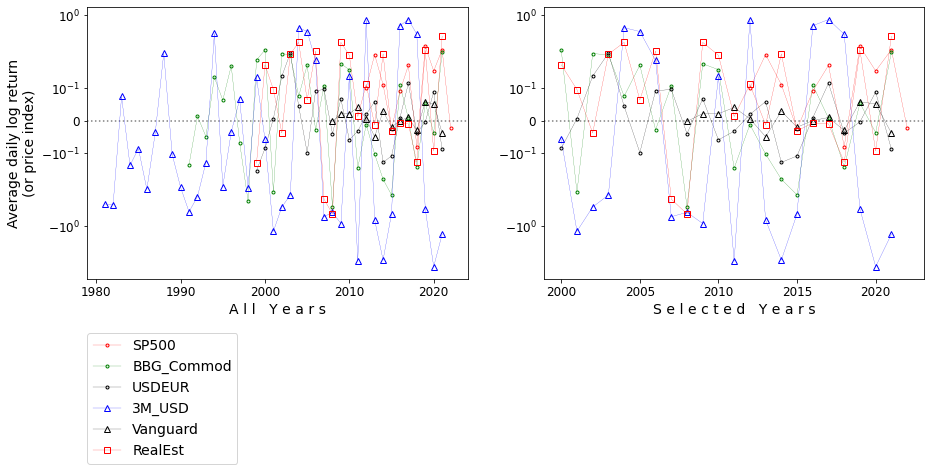

In [9]:
import matplotlib.pyplot as plt

FONTSIZE = 14
TICKS_FONTSIZE = 12
DISPLAY_MARGIN_RATIO = 5
YTIC_VALUES = [1, 0.1, 0, -0.1, -1]
LINTHRESH_Y = 0.2
SELECTED_YEARS_TICKS = [2000, 2005, 2010, 2015, 2020]
COLORS  = ['r', 'g', 'k', 'b', 'k', 'r']
SYMBOLS = ['.', '.', '.', '^', '^', 's']
LINEWIDTH = 0.2


def plot_yearly_aggregated_data_symlog_y(df_all_yearly=None, ytic_values=[]):

    if df_all_yearly is not None:
        fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
        for xtick_ytick in ['xtick', 'ytick']:
            plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

        # exclude the inflation data set from the plots because it is conceptually different
        data_set_names_to_plot = [name for name in df_all_yearly.columns if name != 'Inflation']
            
        # all years
        ax = axes[0]
        ax.set_xlabel('A l l   Y e a r s', fontsize=FONTSIZE)
        ax.set_ylabel('Average daily log return\n(or price index)', fontsize=FONTSIZE)
        ax.set_yticks(ytic_values)
        ax.set_yticklabels([str(y).replace('-', '$-\ $') for y in ytic_values])
        ax.axhline(0, c='gray', ls='dotted')
        for data_set_name, color, symbol in zip(data_set_names_to_plot, COLORS, SYMBOLS):
            ax.set_yscale('symlog', linthresh=LINTHRESH_Y)
            ax.plot(df_all_yearly[data_set_name], marker=symbol, linewidth=LINEWIDTH, color=color,
                    markerfacecolor='none', markeredgecolor=color, label=data_set_name)
            ax.legend(bbox_to_anchor=(0, -0.2), loc=2, borderaxespad=0, fontsize=FONTSIZE)

        # selected years
        df_all_yearly_sel = df_all_yearly[SELECTED_YEARS_TICKS[0] <= df_all_yearly.index]
        ax = axes[1]
        ax.set_xticks(SELECTED_YEARS_TICKS)
        ax.set_xlabel('S e l e c t e d   Y e a r s', fontsize=FONTSIZE)
        ax.axhline(0, c='gray', ls='dotted')
        for data_set_name, color, symbol in zip(data_set_names_to_plot, COLORS, SYMBOLS):
            ax.set_yscale('symlog', linthresh=LINTHRESH_Y)
            ax.plot(df_all_yearly_sel[data_set_name], marker=symbol, linewidth=LINEWIDTH, color=color,
                    markerfacecolor='none', markeredgecolor=color)
            
        plt.show()


plot_yearly_aggregated_data_symlog_y(df_all_yearly=df_all_yearly, ytic_values=YTIC_VALUES)

###### Correlation matrix of the yearly aggregated data

In [10]:
df_all_yearly_corr = df_all_yearly.corr()
print('\nCorrelation matrix using all data points (already displayed above, shown here for comparison only).')
display(df_corr_daily.round(2))
print('\nCorrelation matrix using yearly aggregated data.')
display(df_all_yearly_corr.round(2))


Correlation matrix using all data points (already displayed above, shown here for comparison only).


,SP500,BBG_Commod,USDEUR,3M_USD,Vanguard,RealEst
SP500,1.00,0.34,0.02,0.06,0.00,0.73
BBG_Commod,0.34,1.00,0.27,0.03,-0.08,0.18
USDEUR,0.02,0.27,1.00,0.02,0.06,0.08
3M_USD,0.06,0.03,0.02,1.00,-0.05,0.05
Vanguard,0.00,-0.08,0.06,-0.05,1.00,-0.06
RealEst,0.73,0.18,0.08,0.05,-0.06,1.00



Correlation matrix using yearly aggregated data.


,SP500,BBG_Commod,USDEUR,3M_USD,Vanguard,Inflation,RealEst
SP500,1.00,0.65,0.30,-0.19,0.29,0.47,0.63
BBG_Commod,0.65,1.00,0.19,0.26,0.11,0.64,0.49
USDEUR,0.30,0.19,1.00,0.07,0.17,-0.09,0.02
3M_USD,-0.19,0.26,0.07,1.00,-0.46,0.15,0.03
Vanguard,0.29,0.11,0.17,-0.46,1.00,-0.21,0.13
Inflation,0.47,0.64,-0.09,0.15,-0.21,1.00,0.38
RealEst,0.63,0.49,0.02,0.03,0.13,0.38,1.00


### Correlation depends on aggregation length
#### Task: Observe changes with several other pairs as well

Plot other pairs also, not only the currently plotted ones, and think about the plots.

In [11]:
diff_abs = (df_all_yearly_corr - df_corr_daily).dropna(how='all').dropna(how='all', axis=1)
print('\nDifference:  Correlation of yearly aggregated values  -  Correlation of daily values')
display(diff_abs.round(2))


Difference:  Correlation of yearly aggregated values  -  Correlation of daily values


,3M_USD,BBG_Commod,RealEst,SP500,USDEUR,Vanguard
3M_USD,0.00,0.23,-0.03,-0.25,0.05,-0.41
BBG_Commod,0.23,0.00,0.31,0.31,-0.08,0.19
RealEst,-0.03,0.31,0.00,-0.10,-0.06,0.19
SP500,-0.25,0.31,-0.10,0.00,0.28,0.29
USDEUR,0.05,-0.08,-0.06,0.28,0.00,0.12
Vanguard,-0.41,0.19,0.19,0.29,0.12,0.00


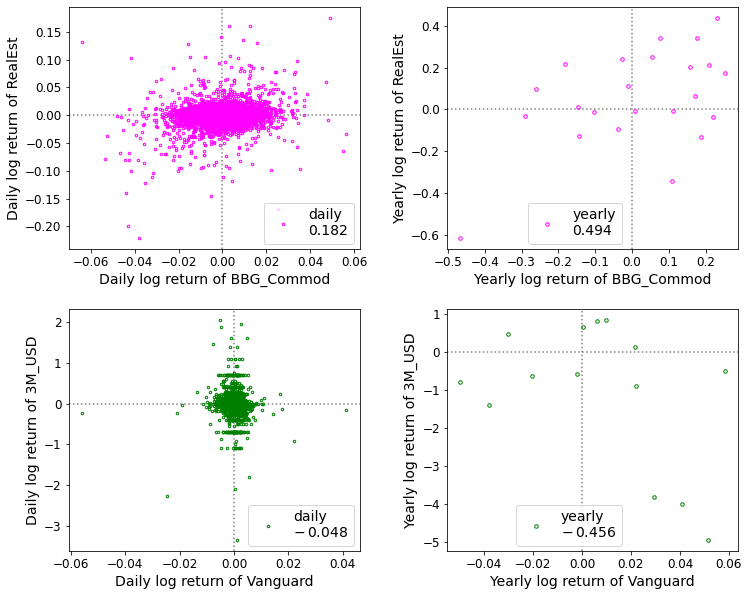

In [12]:
import matplotlib.pyplot as plt

FONTSIZE = 14
MARKERSIZE_SMALL = 5
MARKERSIZE_BIG = 7
PAIRS = {'change': ['BBG_Commod', 'RealEst'], 'const': ['Vanguard', '3M_USD']}
WSPACE_REL_SUBPLOTS = 0.3
HSPACE_REL_SUBPLOTS = 0.25


def plot_scatter_plots_corr_agg(df_all=None, df_all_yearly=None, pairs=None, daily_corr=None, yearly_corr=None):
    """Scatter plot of data for two pairs, both before and after data aggregation
       - the pair called 'change': pair of indexes for which the correlation changes after data aggregation
       - the pair called 'const': no significant change of correlation after data is aggregated"""

    if df_all is not None and df_all_yearly is not None and pairs is not None:
        fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
        for xtick_ytick in ['xtick', 'ytick']:
            plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

        for which_pair, row, color, symbol in zip(['change', 'const'], [0, 1], ['magenta', 'green'], ['.', '.']):
            name_A, name_B = pairs[which_pair]

            # correlation of all data points
            ax = axes[row][0]
            ax.set_xlabel('Daily log return of {}'.format(name_A), fontsize=FONTSIZE)
            ax.set_ylabel('Daily log return of {}'.format(name_B), fontsize=FONTSIZE)
            ax.axhline(0, c='gray', ls='dotted')
            ax.axvline(0, c='gray', ls='dotted')
            ax.plot(df_all[name_A], df_all[name_B], marker='.', linewidth=0.0,
                    markerfacecolor='none', markeredgecolor=color, markersize=MARKERSIZE_SMALL, 
                    label='daily\n' + str(round(daily_corr[name_A][name_B], 3)).replace('-', '$-\,$'))
            ax.legend(bbox_to_anchor=(.98, .02), loc=4, borderaxespad=0., fontsize=FONTSIZE)

            # correlation of aggregated data points
            ax = axes[row][1]
            ax.set_xlabel('Yearly log return of {}'.format(name_A), fontsize=FONTSIZE)
            ax.set_ylabel('Yearly log return of {}'.format(name_B), fontsize=FONTSIZE)
            ax.axhline(0, c='gray', ls='dotted')
            ax.axvline(0, c='gray', ls='dotted')
            ax.plot(df_all_yearly[name_A], df_all_yearly[name_B], marker='.', linewidth=0.0,
                    markerfacecolor='none', markeredgecolor=color, markersize=MARKERSIZE_BIG,
                    label='yearly\n' + str(round(yearly_corr[name_A][name_B], 3)).replace('-', '$-\,$'))
            ax.legend(bbox_to_anchor=(.6, .02), loc=4, borderaxespad=0., fontsize=FONTSIZE)
        
        plt.subplots_adjust(wspace=WSPACE_REL_SUBPLOTS, hspace=HSPACE_REL_SUBPLOTS)
        plt.show()


plot_scatter_plots_corr_agg(df_all=df_all, df_all_yearly=df_all_yearly, pairs=PAIRS,
                            daily_corr=df_corr_daily, yearly_corr=df_all_yearly_corr)

### Autocorrelation of asset class indexes

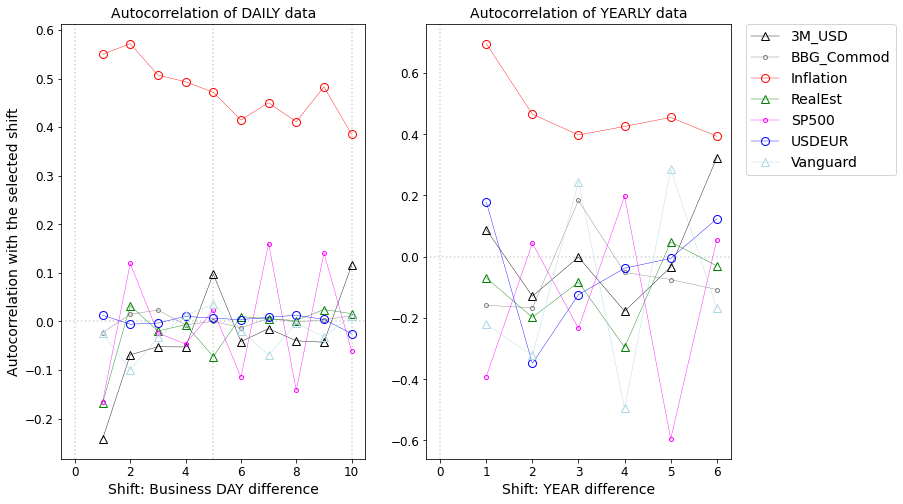

In [13]:
from matplotlib import pyplot as plt

AUTOCORR_DAILY_SHIFTS = range(1, 11)
AUTOCORR_YEARLY_SHIFTS = range(1, 7)
WSPACE_REL_SUBPLOTS = 0.2
HSPACE_REL_SUBPLOTS = 0.0
MARKERSIZE = 8
COLORS = 'black', 'gray', 'red', 'green', 'magenta', 'blue', 'lightblue'
MARKERS = ['^', '.', 'o'] * 3


def plot_autocorr_daily_yearly(df_daily=None, df_yearly=None):
    """
    Autocorrelation plot of daily and yearly data sets.
    """
    
    if df_daily is not None and df_yearly is not None:
        autocorr_daily = {}
        for col in df_daily.columns:
            autocorr_daily[col] = {shift: df_daily[col].autocorr(shift) for shift in AUTOCORR_DAILY_SHIFTS}
        autocorr_yearly = {}
        for col in df_yearly.columns:
            autocorr_yearly[col] = {shift: df_yearly[col].autocorr(shift) for shift in AUTOCORR_YEARLY_SHIFTS}

        fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))
        for xtick_ytick in ['xtick', 'ytick']:
            plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

        # daily
        ax = axes[0]
        ax.set_title('Autocorrelation of DAILY data', fontsize=FONTSIZE)
        ax.set_xlabel('Shift: Business DAY difference', fontsize=FONTSIZE)
        ax.set_ylabel('Autocorrelation with the selected shift', fontsize=FONTSIZE)
        ax.axhline(0, c='lightgray', ls='dotted')
        ax.axvline(0, c='lightgray', ls='dotted')
        ax.axvline(5, c='lightgray', ls='dotted')
        ax.axvline(10, c='lightgray', ls='dotted')
        for column, color, marker in zip(sorted(autocorr_daily.keys()), COLORS, MARKERS):
            ax.plot(autocorr_daily[column].keys(), autocorr_daily[column].values(), linewidth=0.4,
                    markerfacecolor='none', markeredgecolor=color, markersize=MARKERSIZE, color=color,
                    label=column, marker=marker)

        # yearly
        ax = axes[1]
        ax.set_title('Autocorrelation of YEARLY data', fontsize=FONTSIZE)
        ax.set_xlabel('Shift: YEAR difference', fontsize=FONTSIZE)
        ax.axhline(0, c='lightgray', ls='dotted')
        ax.axvline(0, c='lightgray', ls='dotted')
        for column, color, marker in zip(sorted(autocorr_yearly.keys()), COLORS, MARKERS):
            ax.plot(autocorr_yearly[column].keys(), autocorr_yearly[column].values(), linewidth=0.4,
                    markerfacecolor='none', markeredgecolor=color, markersize=MARKERSIZE, color=color,
                    label=column, marker=marker)
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=FONTSIZE)

    plt.subplots_adjust(wspace=WSPACE_REL_SUBPLOTS, hspace=HSPACE_REL_SUBPLOTS)
    plt.show()

    
plot_autocorr_daily_yearly(df_daily=df_all, df_yearly=df_all_yearly)

### Infographic on asset class correlations

Visual Capitalist: Visualizing Asset Class Correlation Over 25 Years (1996-2020)
<br/>
https://advisor.visualcapitalist.com/asset-class-correlation-over-25-years

## Recommended short videos and summaries

https://www.investopedia.com $\,\rightarrow\,$ Bonds, Equity, Commodity, Credit, FX